# MODELSKA ANALIZA 1 - 2.naloga

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
from matplotlib import patches
from scipy.optimize import curve_fit, linprog

plt.rcParams.update({'font.size': 16})

In [2]:
zivila = pd.read_csv('zivila.dat', sep='\t', index_col=False).set_index('zivilo')

print(zivila)

                 energija[kcal]  mascobe[g]  ogljikovi hidrati[g]  \
zivilo                                                              
Ovseni_kosmici              369        6.10                 64.00   
Jabolko                      52        0.17                 13.81   
Pomfri                       93       12.00                 21.55   
Govedina                    254       20.00                  0.00   
Svinjina                    236       17.99                  0.00   
Piscanec                    114        1.65                  0.00   
Mleko                        60        3.25                  4.52   
Sir_edamec                  357       27.80                  1.43   
Kruh_bel                    266        3.64                 47.51   
Kruh_polnozrnat             247        3.35                 41.29   
Maslo                       717       81.11                  0.06   
Skusa_soljena               305       25.10                  0.00   
Losos                       142   

## Prvi problem - Minimizacija kalorij

['Solata' 'Pomaranca' 'Marmelada' 'Kakav' 'Sol' 'Radenska']
\begin{tabular}{lrr}
\toprule
{} &  Količina &  PDV[\%] \\
\midrule
energija[kcal]       &    1297.3 &     0.0 \\
mascobe[g]           &      70.0 &   100.0 \\
ogljikovi hidrati[g] &     310.0 &   100.0 \\
proteini[g]          &     101.7 &   203.5 \\
Ca[mg]               &    1000.0 &   100.0 \\
Fe[mg]               &      72.6 &   403.5 \\
Vitamin C[mg]        &      60.0 &   100.0 \\
Kalij[mg]            &    8199.5 &   234.3 \\
Natrij[mg]           &    2400.0 &   480.0 \\
Cena[EUR]            &       4.2 &     0.0 \\
\bottomrule
\end{tabular}



C:\Users\Tadej\AppData\Local\Temp\ipykernel_4872\553933433.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(a.to_latex())


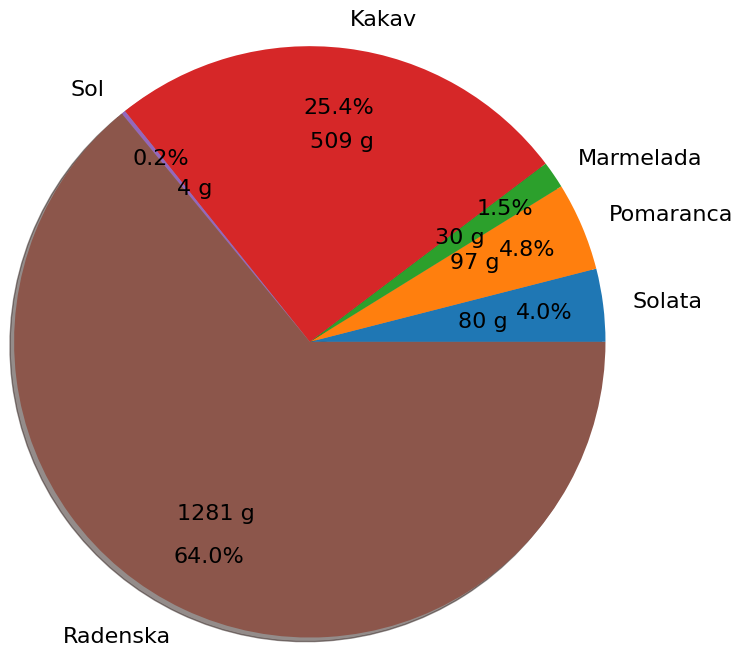

In [3]:
# Vektor c
c = zivila['energija[kcal]'].values

# Vektor b_ub
b_ub = np.array([-70., -310., -50., -1000., -18., -60., -3500., -500., 2400, 20])

# Matrika A_up
A_ub = np.zeros((len(b_ub), len(zivila['energija[kcal]'].values)))

A_ub[0] = -zivila['mascobe[g]']
A_ub[1] = -zivila['ogljikovi hidrati[g]']
A_ub[2] = -zivila['proteini[g]']
A_ub[3] = -zivila['Ca[mg]']
A_ub[4] = -zivila['Fe[mg]']
A_ub[5] = -zivila['Vitamin C[mg]']
A_ub[6] = -zivila['Kalij[mg]']
A_ub[7] = -zivila['Natrij[mg]']
A_ub[8] = zivila['Natrij[mg]']
A_ub[9] = np.ones(len(A_ub[9]))

sol = linprog(c, A_ub, b_ub)
x = sol['x'][sol['x']>0.00001]
labels = zivila.index.values
labels = labels[sol['x']>0.00001]

print(labels)

fig, ax = plt.subplots()
ax.pie(x, labels=labels, autopct='%1.1f%%', pctdistance=0.8, shadow=True, radius=2)
ax.text(1.0,0.1,f'{round(x[0]*100)} g')
ax.text(0.95,0.50,f'{round(x[1]*100)} g')
ax.text(0.85,0.67,f'{round(x[2]*100)} g')
ax.text(0.,1.32,f'{round(x[3]*100)} g')
ax.text(-0.9,1.,f'{round(x[4]*100)} g')
ax.text(-0.9,-1.2,f'{round(x[5]*100)} g')


for i, item in enumerate(labels):
    if i == 0:
        a = x[i] * zivila.loc[item]
    else:
        a = a + x[i] * zivila.loc[item]

a = pd.DataFrame(a)
a = a.rename(columns={0:'Količina'})
PDVs = np.array([np.inf, 70., 310., 50., 1000., 18., 60., 3500., 500., np.inf])
a['PDV[%]'] = np.round(a['Količina'].values / PDVs * 100, 1)
a['Količina'] = np.round(a['Količina'].values, 1)

print(a.to_latex())

# Problem - minimizacija kalorij z omejitvijo količine živil

\begin{tabular}{lrr}
\toprule
{} &  Količina &  PDV[\%] \\
\midrule
energija[kcal]       &    1455.7 &     0.0 \\
mascobe[g]           &      70.0 &   100.0 \\
ogljikovi hidrati[g] &     310.0 &   100.0 \\
proteini[g]          &      63.6 &   127.2 \\
Ca[mg]               &    1000.0 &   100.0 \\
Fe[mg]               &      34.8 &   193.3 \\
Vitamin C[mg]        &     382.9 &   638.2 \\
Kalij[mg]            &    6172.6 &   176.4 \\
Natrij[mg]           &    2400.0 &   480.0 \\
Cena[EUR]            &       6.0 &     0.0 \\
\bottomrule
\end{tabular}



C:\Users\Tadej\AppData\Local\Temp\ipykernel_4872\3318763407.py:65: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(a.to_latex())


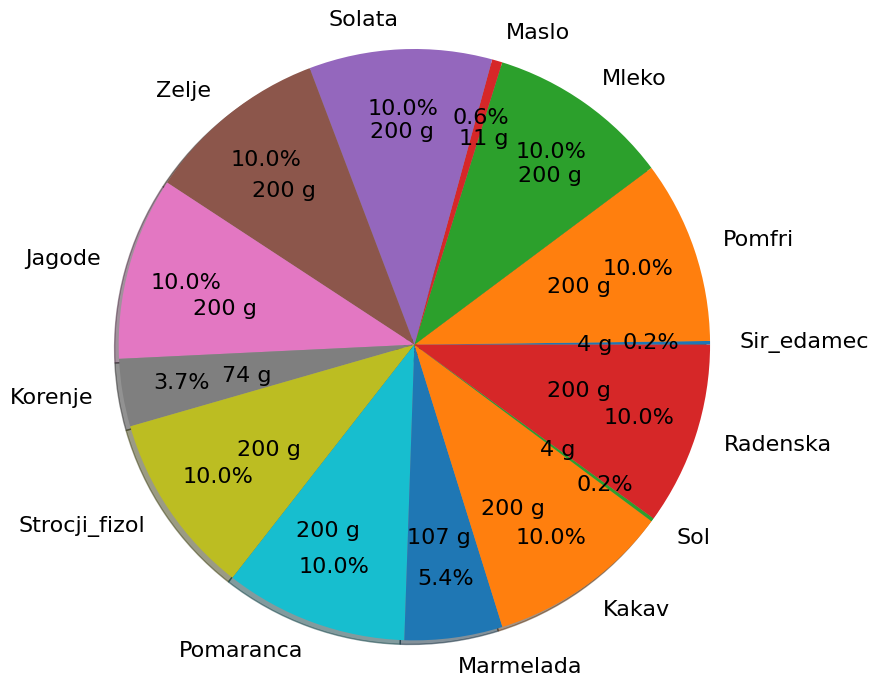

In [4]:
# Vektor c
c = zivila['energija[kcal]'].values

# Vektor b_ub
b_ub = np.array([-70., -310., -50., -1000., -18., -60., -3500., -500., 2400, 20])

# Matrika A_up
A_ub = np.zeros((len(b_ub), len(zivila['energija[kcal]'].values)))

A_ub[0] = -zivila['mascobe[g]']
A_ub[1] = -zivila['ogljikovi hidrati[g]']
A_ub[2] = -zivila['proteini[g]']
A_ub[3] = -zivila['Ca[mg]']
A_ub[4] = -zivila['Fe[mg]']
A_ub[5] = -zivila['Vitamin C[mg]']
A_ub[6] = -zivila['Kalij[mg]']
A_ub[7] = -zivila['Natrij[mg]']
A_ub[8] = zivila['Natrij[mg]']
A_ub[9] = np.ones(len(A_ub[9]))

sol = linprog(c, A_ub, b_ub, bounds=(0,2))
x = sol['x'][sol['x']>0.00001]
labels = zivila.index.values
labels = labels[sol['x']>0.00001]

labels = labels.tolist()
labels.remove(labels[2])
labels.insert(0, 'Sir_edamec')
labels = np.array(labels)
val = x[2]
x = x.tolist()
x.remove(x[2])
x.insert(0, val)
x = np.array(x)

fig, ax = plt.subplots()
ax.pie(x, labels=labels, autopct='%1.1f%%', pctdistance=0.8, shadow=True, radius=2)
ax.text(1.1,-0.04,f'{round(x[0]*100)} g')
ax.text(0.9,0.35,f'{round(x[1]*100)} g')
ax.text(0.7,1.1,f'{round(x[2]*100)} g')
ax.text(0.3,1.35,f'{round(x[3]*100)} g')
ax.text(-0.3,1.4,f'{round(x[4]*100)} g')
ax.text(-1.1,1.0,f'{round(x[5]*100)} g')
ax.text(-1.5,0.2,f'{round(x[6]*100)} g')
ax.text(-1.3,-0.25,f'{round(x[7]*100)} g')
ax.text(-1.2,-0.75,f'{round(x[8]*100)} g')
ax.text(-0.8,-1.3,f'{round(x[9]*100)} g')
ax.text(-0.05,-1.35,f'{round(x[10]*100)} g')
ax.text(0.45,-1.15,f'{round(x[11]*100)} g')
ax.text(0.85,-0.75,f'{round(x[12]*100)} g')
ax.text(0.9,-0.35,f'{round(x[13]*100)} g')

for i, item in enumerate(labels):
    if i == 0:
        a = x[i] * zivila.loc[item]
    else:
        a = a + x[i] * zivila.loc[item]

a = pd.DataFrame(a)
a = a.rename(columns={0:'Količina'})
PDVs = np.array([np.inf, 70., 310., 50., 1000., 18., 60., 3500., 500., np.inf])
a['PDV[%]'] = np.round(a['Količina'].values / PDVs * 100, 1)
a['Količina'] = np.round(a['Količina'].values, 1)

print(a.to_latex())

## Drugi problem - minimizacija maščob

\begin{tabular}{lrr}
\toprule
{} &  Količina &  PDV[\%] \\
\midrule
energija[kcal]       &    2000.0 &     0.0 \\
mascobe[g]           &      12.7 &    18.1 \\
ogljikovi hidrati[g] &     446.5 &   144.0 \\
proteini[g]          &      56.8 &   113.6 \\
Ca[mg]               &    1000.0 &   100.0 \\
Fe[mg]               &      18.0 &   100.0 \\
Vitamin C[mg]        &     430.9 &   718.2 \\
Kalij[mg]            &    3703.2 &   105.8 \\
Natrij[mg]           &    2400.0 &   480.0 \\
Cena[EUR]            &       5.2 &     0.0 \\
\bottomrule
\end{tabular}



C:\Users\Tadej\AppData\Local\Temp\ipykernel_4872\2743873464.py:55: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(a.to_latex())


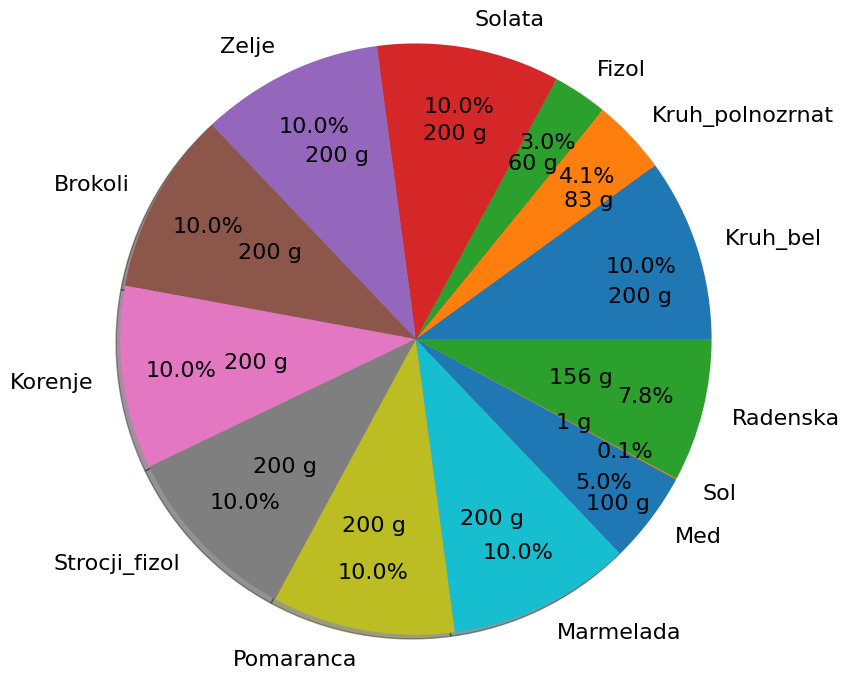

In [5]:
# Vektor c
c = zivila['mascobe[g]'].values

# Vektor b_ub
b_ub = np.array([-2000., -310., -50., -1000., -18., -60., -3500., -500., 2400, 20])

# Matrika A_up
A_ub = np.zeros((len(b_ub), len(zivila['energija[kcal]'].values)))

A_ub[0] = -zivila['energija[kcal]']
A_ub[1] = -zivila['ogljikovi hidrati[g]']
A_ub[2] = -zivila['proteini[g]']
A_ub[3] = -zivila['Ca[mg]']
A_ub[4] = -zivila['Fe[mg]']
A_ub[5] = -zivila['Vitamin C[mg]']
A_ub[6] = -zivila['Kalij[mg]']
A_ub[7] = -zivila['Natrij[mg]']
A_ub[8] = zivila['Natrij[mg]']
A_ub[9] = np.ones(len(A_ub[9]))

sol = linprog(c, A_ub, b_ub, bounds=(0,2))
x = sol['x'][sol['x']>0.00001]
labels = zivila.index.values
labels = labels[sol['x']>0.00001]

fig, ax = plt.subplots()
ax.pie(x, labels=labels, autopct='%1.1f%%', pctdistance=0.8, shadow=True, radius=2)
ax.text(1.3,0.25,f'{round(x[0]*100)} g')
ax.text(1.0,0.9,f'{round(x[1]*100)} g')
ax.text(0.62,1.15,f'{round(x[2]*100)} g')
ax.text(0.05,1.35,f'{round(x[3]*100)} g')
ax.text(-0.75,1.20,f'{round(x[4]*100)} g')
ax.text(-1.2,0.55,f'{round(x[5]*100)} g')
ax.text(-1.3,-0.2,f'{round(x[6]*100)} g')
ax.text(-1.1,-0.9,f'{round(x[7]*100)} g')
ax.text(-0.5,-1.3,f'{round(x[8]*100)} g')
ax.text(0.3,-1.25,f'{round(x[9]*100)} g')
ax.text(1.15,-1.15,f'{round(x[10]*100)} g')
ax.text(0.95,-0.6,f'{round(x[11]*100)} g')
ax.text(0.9,-0.3,f'{round(x[12]*100)} g')


for i, item in enumerate(labels):
    if i == 0:
        a = x[i] * zivila.loc[item]
    else:
        a = a + x[i] * zivila.loc[item]

a = pd.DataFrame(a)
a = a.rename(columns={0:'Količina'})
PDVs = np.array([np.inf, 70., 310., 50., 1000., 18., 60., 3500., 500., np.inf])
a['PDV[%]'] = np.round(a['Količina'].values / PDVs * 100, 1)
a['Količina'] = np.round(a['Količina'].values, 1)

print(a.to_latex())

## Tretji problem - minimizacija cene

['Ovseni_kosmici' 'Pomfri' 'Mleko' 'Sir_edamec' 'Kruh_bel' 'Zelje'
 'Krompir' 'Banana' 'Olivno_olje']
\begin{tabular}{lrr}
\toprule
{} &  Količina &  PDV[\%] \\
\midrule
energija[kcal]       &    2000.0 &     0.0 \\
mascobe[g]           &      70.0 &   100.0 \\
ogljikovi hidrati[g] &     318.1 &   102.6 \\
proteini[g]          &      77.1 &   154.2 \\
Ca[mg]               &    1000.0 &   100.0 \\
Fe[mg]               &      18.6 &   103.3 \\
Vitamin C[mg]        &     143.4 &   239.1 \\
Kalij[mg]            &    3500.0 &   100.0 \\
Natrij[mg]           &    2400.0 &   480.0 \\
Cena[EUR]            &       1.7 &     0.0 \\
\bottomrule
\end{tabular}



C:\Users\Tadej\AppData\Local\Temp\ipykernel_4872\626456596.py:54: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(a.to_latex())


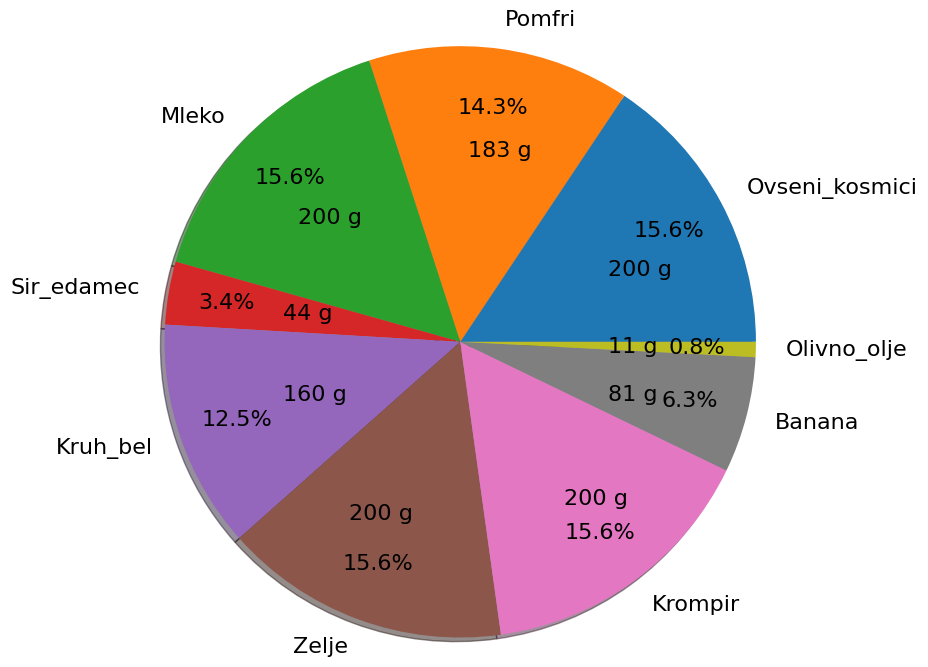

In [6]:
# Vektor c
c = zivila['Cena[EUR]'].values

# Vektor b_ub
b_ub = np.array([-2000., -70., -310., -50., -1000., -18., -60., -3500., -500., 2400, 20])
# b_ub = np.array([-2000., -310., -50., -1000., -18., -60., -3500., -500., 2400, 20])

# Matrika A_up
A_ub = np.zeros((len(b_ub), len(zivila['energija[kcal]'].values)))

A_ub[0] = -zivila['energija[kcal]']
A_ub[1] = -zivila['mascobe[g]']
A_ub[2] = -zivila['ogljikovi hidrati[g]']
A_ub[3] = -zivila['proteini[g]']
A_ub[4] = -zivila['Ca[mg]']
A_ub[5] = -zivila['Fe[mg]']
A_ub[6] = -zivila['Vitamin C[mg]']
A_ub[7] = -zivila['Kalij[mg]']
A_ub[8] = -zivila['Natrij[mg]']
A_ub[9] = zivila['Natrij[mg]']
A_ub[10] = np.ones(len(A_ub[9]))

sol = linprog(c, A_ub, b_ub, bounds=(0,2))
x = sol['x'][sol['x']>0.00001]
labels = zivila.index.values
labels = labels[sol['x']>0.00001]

fig, ax = plt.subplots()
ax.pie(x, labels=labels, autopct='%1.1f%%', pctdistance=0.8, shadow=True, radius=2)
ax.text(1.0,0.45,f'{round(x[0]*100)} g')
ax.text(0.05,1.25,f'{round(x[1]*100)} g')
ax.text(-1.1,0.8,f'{round(x[2]*100)} g')
ax.text(-1.2,0.15,f'{round(x[3]*100)} g')
ax.text(-1.2,-0.4,f'{round(x[4]*100)} g')
ax.text(-0.75,-1.2,f'{round(x[5]*100)} g')
ax.text(0.7,-1.1,f'{round(x[6]*100)} g')
ax.text(1.0,-0.4,f'{round(x[7]*100)} g')
ax.text(1.0,-0.07,f'{round(x[8]*100)} g')


for i, item in enumerate(labels):
    if i == 0:
        a = x[i] * zivila.loc[item]
    else:
        a = a + x[i] * zivila.loc[item]

a = pd.DataFrame(a)
a = a.rename(columns={0:'Količina'})
PDVs = np.array([np.inf, 70., 310., 50., 1000., 18., 60., 3500., 500., np.inf])
a['PDV[%]'] = np.round(a['Količina'].values / PDVs * 100, 1)
a['Količina'] = np.round(a['Količina'].values, 1)

print(labels)
print(a.to_latex())

In [7]:
skupine = {
    'Sadje': ['Jabolko', 'Grozdje', 'Jagode', 'Banana', 'Pomaranca'],
    'Zelenjava': ['Solata', 'Zelje', 'Rdeca_pesa', 'Brokoli', 'Paradiznik', 'Paprika', 'Korenje', 'Strocji_fizol', 'Kumara', 'Fizol', 'Krompir'],
    'Meso': ['Govedina', 'Svinjina', 'Piscanec', 'Skusa_soljena', 'Losos', 'Puran', 'Postrv', 'Mortadela', 'Tuna'],
    'Mlečni izdelki': ['Mleko', 'Sir_edamec', 'Maslo'],
    'Pijače': ['Pivo', 'Radenska', 'Vino_cabernet', 'Vino_traminec', 'Ameriska_pica'],
    'Ostalo': ['Ovseni_kosmici', 'Pomfri', 'Kruh_bel', 'Kruh_polnozrnat', 'Riz', 'Cokolada', 'Jajce', 'Makaroni', 'Torta', 'Nutella', 'Kokice', 'Olivno_olje', 'Marmelada', 'Med', 'Kakav', 'Sol']
}

zivila2 = zivila.copy()

zivila2['Skupina'] = zivila2.index.to_series().apply(lambda zivilo: next((k for k, v in skupine.items() if zivilo in v), 'Ostalo'))

print(zivila2)

                 energija[kcal]  mascobe[g]  ogljikovi hidrati[g]  \
zivilo                                                              
Ovseni_kosmici              369        6.10                 64.00   
Jabolko                      52        0.17                 13.81   
Pomfri                       93       12.00                 21.55   
Govedina                    254       20.00                  0.00   
Svinjina                    236       17.99                  0.00   
Piscanec                    114        1.65                  0.00   
Mleko                        60        3.25                  4.52   
Sir_edamec                  357       27.80                  1.43   
Kruh_bel                    266        3.64                 47.51   
Kruh_polnozrnat             247        3.35                 41.29   
Maslo                       717       81.11                  0.06   
Skusa_soljena               305       25.10                  0.00   
Losos                       142   

## Četrti problem - brez zelenjave in sadja

['Ovseni_kosmici' 'Govedina' 'Sir_edamec' 'Maslo' 'Cokolada' 'Jagode'
 'Torta' 'Nutella' 'Kokice' 'Olivno_olje' 'Marmelada' 'Med']
\begin{tabular}{lrr}
\toprule
{} &  Količina &  PDV[\%] \\
\midrule
energija[kcal]       &    9205.4 &     0.0 \\
mascobe[g]           &     573.7 &   819.6 \\
ogljikovi hidrati[g] &     925.7 &   298.6 \\
proteini[g]          &     120.4 &   240.9 \\
Ca[mg]               &    1585.4 &   158.5 \\
Fe[mg]               &      35.5 &   197.4 \\
Vitamin C[mg]        &      60.0 &   100.0 \\
Kalij[mg]            &    4369.7 &   124.8 \\
Natrij[mg]           &    2400.0 &   480.0 \\
Cena[EUR]            &      16.4 &     0.0 \\
\bottomrule
\end{tabular}



C:\Users\Tadej\AppData\Local\Temp\ipykernel_4872\3278669232.py:59: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(a.to_latex())


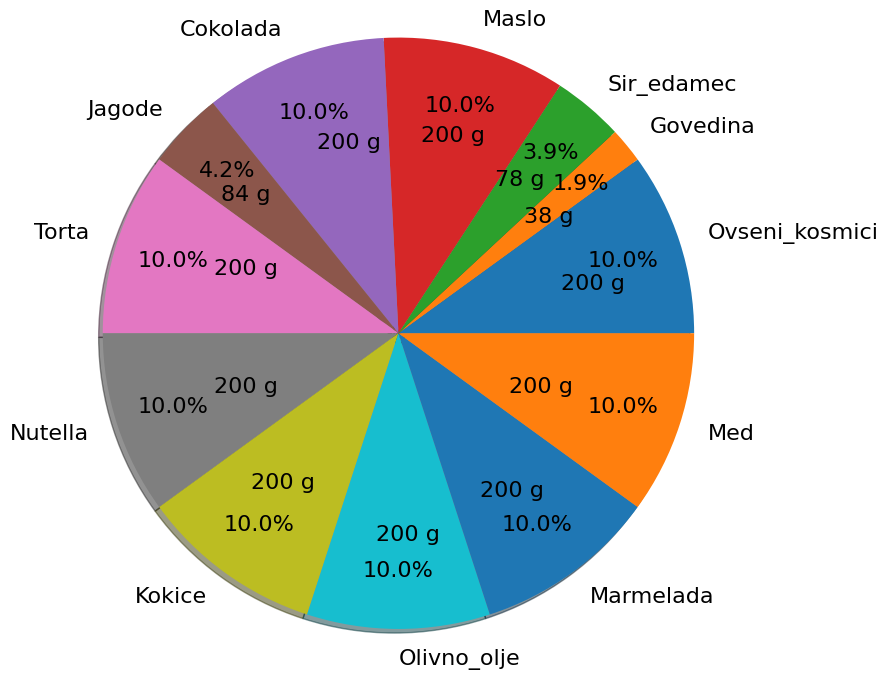

In [8]:
df = zivila2[~zivila2['Skupina'].isin(['Zelenjava'])]
df = df.drop('Skupina', axis=1)

# Vektor c
c = -df['energija[kcal]'].values

# Vektor b_ub
b_ub = np.array([-70., -310., -50., -1000., -18., -60., -3500., -500., 2400, 20])

# Matrika A_up
A_ub = np.zeros((len(b_ub), len(df['energija[kcal]'].values)))

A_ub[0] = -df['mascobe[g]']
A_ub[1] = -df['ogljikovi hidrati[g]']
A_ub[2] = -df['proteini[g]']
A_ub[3] = -df['Ca[mg]']
A_ub[4] = -df['Fe[mg]']
A_ub[5] = -df['Vitamin C[mg]']
A_ub[6] = -df['Kalij[mg]']
A_ub[7] = -df['Natrij[mg]']
A_ub[8] = df['Natrij[mg]']
A_ub[9] = np.ones(len(A_ub[9]))

sol = linprog(c, A_ub, b_ub, bounds=(0,2))
x = sol['x'][sol['x']>0.00001]
labels = df.index.values
labels = labels[sol['x']>0.00001]

print(labels)

fig, ax = plt.subplots()
ax.pie(x, labels=labels, autopct='%1.1f%%', pctdistance=0.8, shadow=True, radius=2)
ax.text(1.1,0.3,f'{round(x[0]*100)} g')
ax.text(0.85,0.75,f'{round(x[1]*100)} g')
ax.text(0.65,1,f'{round(x[2]*100)} g')
ax.text(0.15,1.3,f'{round(x[3]*100)} g')
ax.text(-0.55,1.25,f'{round(x[4]*100)} g')
ax.text(-1.2,0.9,f'{round(x[5]*100)} g')
ax.text(-1.25,0.4,f'{round(x[6]*100)} g')
ax.text(-1.25,-0.4,f'{round(x[7]*100)} g')
ax.text(-1.,-1.05,f'{round(x[8]*100)} g')
ax.text(-0.15,-1.4,f'{round(x[9]*100)} g')
ax.text(0.55,-1.10,f'{round(x[10]*100)} g')
ax.text(0.75,-0.40,f'{round(x[11]*100)} g')


for i, item in enumerate(labels):
    if i == 0:
        a = x[i] * df.loc[item]
    else:
        a = a + x[i] * df.loc[item]

a = pd.DataFrame(a)
a = a.rename(columns={0:'Količina'})
PDVs = np.array([np.inf, 70., 310., 50., 1000., 18., 60., 3500., 500., np.inf])
a['PDV[%]'] = np.round(a['Količina'].values / PDVs * 100, 1)
a['Količina'] = np.round(a['Količina'].values, 1)

print(a.to_latex())

## Kratka študija o raznovrstnosti prehrane v odvisnosti od cene

In [9]:
# Vektor c
c = zivila['energija[kcal]'].values

cene = np.arange(1.7, 18, 0.1)
real_cene = []
kvaliteta = []
kalorije = []

for cena in cene:

    # Vektor b_ub
    b_ub = np.array([-70., -310., -50., -1000., -18., -60., -3500., -500., 2400., 20., -cena-0.1, cena+0.1])

    # Matrika A_up
    A_ub = np.zeros((len(b_ub), len(zivila['energija[kcal]'].values)))

    A_ub[0] = -zivila['mascobe[g]']
    A_ub[1] = -zivila['ogljikovi hidrati[g]']
    A_ub[2] = -zivila['proteini[g]']
    A_ub[3] = -zivila['Ca[mg]']
    A_ub[4] = -zivila['Fe[mg]']
    A_ub[5] = -zivila['Vitamin C[mg]']
    A_ub[6] = -zivila['Kalij[mg]']
    A_ub[7] = -zivila['Natrij[mg]']
    A_ub[8] = zivila['Natrij[mg]']
    A_ub[9] = np.ones(len(A_ub[9]))
    A_ub[10] = -zivila['Cena[EUR]']
    A_ub[11] = zivila['Cena[EUR]']

    sol = linprog(c, A_ub, b_ub, bounds=(0,2))
    x = sol['x'][sol['x']>0.00001]
    labels = zivila.index.values
    labels = labels[sol['x']>0.00001]

    for i, item in enumerate(labels):
        if i == 0:
            a = x[i] * zivila.loc[item]
        else:
            a = a + x[i] * zivila.loc[item]

    a = pd.DataFrame(a)
    a = a.rename(columns={0:'Količina'})
    PDVs = np.array([np.inf, 70., 310., 50., 1000., 18., 60., 3500., 500., np.inf])
    a['PDV[%]'] = np.round(a['Količina'].values / PDVs * 100, 1)
    a['Količina'] = np.round(a['Količina'].values, 1)

    if sol['success']:
        real_cene.append(a.loc['Cena[EUR]', 'Količina'])
        kvaliteta.append(a.sum()['PDV[%]']/8)
        kalorije.append(a.loc['energija[kcal]', 'Količina'])

print(a.to_latex())

C:\Users\Tadej\AppData\Local\Temp\ipykernel_4872\40657600.py:30: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  sol = linprog(c, A_ub, b_ub, bounds=(0,2))
C:\Users\Tadej\AppData\Local\Temp\ipykernel_4872\40657600.py:30: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  sol = linprog(c, A_ub, b_ub, bounds=(0,2))
C:\Users\Tadej\AppData\Local\Temp\ipykernel_4872\40657600.py:30: OptimizeWarning: Solving system with option 'sym_pos':False failed. This may happen occasionally, especially as the solution is approached. However, if you see this frequently, your problem may be numerically challenging. If you cannot impro

\begin{tabular}{lrr}
\toprule
{} &  Količina &  PDV[\%] \\
\midrule
energija[kcal]       &    1989.1 &     0.0 \\
mascobe[g]           &      70.0 &   100.0 \\
ogljikovi hidrati[g] &     310.0 &   100.0 \\
proteini[g]          &     107.0 &   214.0 \\
Ca[mg]               &    1000.0 &   100.0 \\
Fe[mg]               &      41.1 &   228.4 \\
Vitamin C[mg]        &     481.1 &   801.9 \\
Kalij[mg]            &    6929.7 &   198.0 \\
Natrij[mg]           &    2400.0 &   480.0 \\
Cena[EUR]            &      18.0 &     0.0 \\
\bottomrule
\end{tabular}



C:\Users\Tadej\AppData\Local\Temp\ipykernel_4872\40657600.py:52: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(a.to_latex())


[165.3125, 168.8375, 173.2625, 173.8625, 174.3375, 174.1, 173.83749999999998, 174.2375, 171.25, 167.6875, 164.11249999999998, 160.55, 156.975, 153.425, 154.08749999999998, 149.3125, 192.27499999999998, 205.5125, 209.0125, 209.775, 210.9125, 212.0375, 213.16250000000002, 214.2125, 215.1375, 216.05, 216.975, 218.14999999999998, 219.625, 221.1125, 222.6, 224.075, 225.55, 227.0125, 228.33750000000003, 229.6375, 230.95000000000002, 232.275, 233.5875, 234.8875, 236.2125, 237.53750000000002, 238.83750000000003, 244.925, 253.95, 261.9625, 269.975, 277.9875, 279.65, 278.95000000000005, 276.6375, 274.3375, 272.85, 273.5875, 273.925, 273.875, 273.8375, 273.8, 273.7625, 273.7125, 273.6875, 273.6375, 273.6, 273.55, 273.5125, 273.45, 273.425, 273.375, 273.35, 273.3, 273.2625, 273.225, 273.1875, 273.1375, 273.1125, 273.075, 273.025, 273.0, 272.95, 273.0625, 273.25, 273.4375, 273.625, 273.8125, 274.0, 274.1875, 274.36249999999995, 274.5625, 274.73749999999995, 274.92499999999995, 275.1125, 275.3, 275.

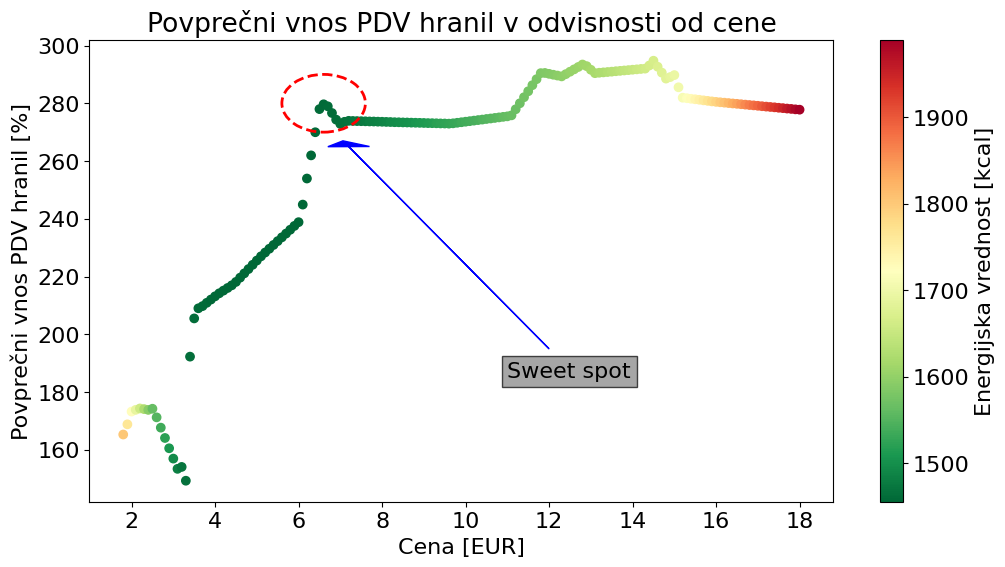

In [10]:
print(kvaliteta)
print(real_cene)
print(kalorije)

colors = plt.cm.RdYlGn_r(np.linspace(0, 1, len(kalorije)))

plt.figure(figsize=(12,6))
plt.title('Povprečni vnos PDV hranil v odvisnosti od cene')
plt.xlabel('Cena [EUR]')
plt.ylabel('Povprečni vnos PDV hranil [%]')
plt.scatter(real_cene, kvaliteta, c=kalorije, cmap='RdYlGn_r')
plt.text(11, 185,'Sweet spot', bbox=dict(facecolor='gray', alpha=0.7))
cbar = plt.colorbar()
cbar.set_label('Energijska vrednost [kcal]')
ellipse = patches.Ellipse((6.6, 280), width=2, height=20, angle=0, edgecolor='red', facecolor='none', lw=2, linestyle='--')
plt.gca().add_patch(ellipse)
plt.arrow(12, 195, 7.2 - 12, 265 - 195, head_width=1, head_length=2, fc='blue', ec='blue')